# < 작문 학습을 위한 연관어 추출 >

- 주요 용도 : 외국인, 어린이 등 작문 학습을 원하는 사람들에게 실제로 쓰이는 작문 데이터를 기반으로 연관 단어를 추출하여 해당 연관단어를 통해 작문 연습을 하도록 도울 수 있습니다

## 데이터 전처리
- JSON파일을 통해 에세이 중 "주장글(sentence)를 읽어 옵니다
- 한국어가 절대 다수이기에 Konlpy를 사용하여, 읽어온 대사의 명사를 분리합니다.
- 단어간 동시 행렬을 생성합니다
- 이를 이용하여 코사인 유사도를 산출할 수 있습니다.

In [683]:
from konlpy.tag import Komoran
import re
from collections import defaultdict
import json
import pandas as pd
import numpy as np
import statistics


In [684]:
import re
import json
import statistics

# 상위 30% 컷
def search_30cut(files):
    for file in files:
        try:
            with open(file, 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # 평균 값 추출
                li.append(data['score']['essay_scoreT_avg'])
    
        except FileNotFoundError:
            print(f"해당 파일 {file}이 존재하지 않습니다.")

    return li

# 각 파일의 글 데이터에서 문장구분 부분을 제거할 수 있는 함수
def remove_sentence_delimiters(text):
    # '#@문장구분#' 를 제거하여, 데이터를 합칠 수 있습니다.
    return re.sub(r'#@문장구분#', '', text)


# 전체 파일의 문단을 하나의 문자열로 합치는 함수.
def combine_paragraphs(files, cut_off_score):
    all_text = ''
    
    for file in files:
        try:
            with open(file, 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                if data['score']['essay_scoreT_avg'] >= cut_off_score :
                    # 단락 추출 
                    paragraphs = [paragraph['paragraph_txt'] for paragraph in data['paragraph']]
                
                    # 문단을 하나의 문자열로 합치기
                    text = ' '.join(paragraphs)

                    # 문장을 모두 구분한 후, 해당 텍스트를 합칩니다(all_text)
                    clean_text = remove_sentence_delimiters(text)
                    all_text += clean_text + ' '
                
        except FileNotFoundError:
            print(f"해당 파일 {file}이 존재하지 않습니다.")

    return all_text



In [685]:
# 파일명 리스트
# a : 고1 (고등학생 클래스)
# b : 중2 (중학생 클래스)
# c : 초4 (초등학생 클래스)
# 학습자의 작문 레벨에 따라서 연관단어 이용한 작문학습 데이터를 달리가져와야 한다.

# a
#file_names = [f'a ({i}).json' for i in range(1, 70)]

#b
file_names = [f'b ({i}).json' for i in range(1, 70)]

#c
#file_names = [f'c ({i}).json' for i in range(1, 70)]


# 상위 30%의 점수를 얻어내고, 이를 기반으로 글 데이터를 추출하게 됩니다

# <커트라인 점수 추출> 

li = [] #점수들 모아둠. 
# 평균 점수
search_30cut(file_names)

avg = statistics.mean(li)

# 상위 30%의 값을 찾기 위해 점수 리스트를 정렬
sorted_scores = sorted(li, reverse=True)

# 상위 30% 커트라인 찾기
cut_off_index = int(len(sorted_scores) * 0.3)
cut_off_score = sorted_scores[cut_off_index]


# <커트라인 점수 기반 데이터 추출 및 합성>
# 모든 파일의 문장을 하나의 문자열로 합치기. 그런데, 상위 30%의 점수 이상의 글들만 추출
combined_text = combine_paragraphs(file_names, cut_off_score)
text = combined_text
text

'저는 서로 생물학적 차이를 가지고있는 남녀를 평등하게대하는것은 바람직하지 않다고 생각합니다 물론 이말은 남녀를 차별해서대해야한다는 뜻은 아닙니다. 미국 필라델피아대학교 의과대 라지니 버나(Ragini Verma)교수가 이끈 연구팀이 최근에 낸 논문에서 총 949명의 뇌연결망 구조를 보여주는 뇌 영상(DTI)을 분석해보니 남녀 간에 뚜렷한 차이가 나타났다고 보고하였습니다 논문의 요점을 추리면, 여자 뇌에선 대뇌 좌반구와 우반구를 오가는 연결망 구조가 발달한것으로 나타난 반면, 남자 뇌에선 각 대뇌 반구의 내부연결이 상대적으로 더 활발한 것으로 나타났다고 합니다 이런 남녀의 뇌 연결망 구조의 차이로 남자 뇌의 구조는 감각인지와 통합행동에 적합하며, 여자 뇌는 기억과 직관, 사회성에 더 어울림을 보여주는 것이라고 연구팀은 해석하였습니다 이 연구결과가 그렇듯이 남자와 여자의 뇌의 구조에는 분명한 차이가 있고 또 그에따른 기능적인 차이도 있습니다 그래서 저는 남녀를 평등하게 대하는것은 바람직하지 않다고 생각합니다 사실 바람직하지 않다기보다는 우리가 살아가는데에 있어서 효율성이 떨어진다고 생각합니다 왜냐하면 앞에서 말했듯이 남자의 뇌의 구조는 감각인지와 통합행동에 적합하며, 여자의 뇌는 기억과 직관, 사회성에 더 어울림을 보여준다고 나타났습니다 그래서 저는 "남녀의 뇌의 구조의 차이로인한 기능적차이를 서로 비교할것이 아니라 각자의 뇌에서 더 발달해있고 우수한점을 이용하여 직업세계에 접목시켜보면 좋지 않을까?"라는 생각을 하게되었습니다 예를 들어서 감각인지와 통합행동과 같이 신체적조건에서 조금 더 유리한 남자는 운동선수 혹은 헬스트레이너, 기억과 직관, 사회성과 같이 정신적인 측면에서 조금 더 유리한 여자는 정신건강사회복지사 혹은 심리치료사 등과 같은 남녀 각자의 장점을 더 살릴수있는 직업에 종사하면 더 합리적이고 효율적인 삶을 살아갈수 있을것같다고 생각합니다 하지만 "남자는 꼭 이런직업, 여자는 꼭 저런직업을 가져야해!"라는 남녀차별적이고 편견적인 생각을 생각을 한다는

In [686]:
# 단어 분리 및 동시 발생 행렬 위한 빈도 계산 
def extract_nouns(text) :
    komoran = Komoran()
    
    # 특수문자, URL제거
    text = re.sub(r'[^\w\s]','',text)
    
    # 형태소, 품사 정보를 포함한 튜플 리스트 생성
    # [!!!] nouns함수를 통해 추출하면 제대로 명사가 추출되지 않기에
    #     pos + 조건 반복문을 통해 명사를 추출합니다.
    tagged_words = komoran.pos(text)
    
    #명사만 추출하지만, 명사중에서도 단어길이가 2이상, 일반 명사만 반환하도록
    nouns = [word for word, pos in tagged_words 
                 if pos.startswith('N') and len(word) > 1 and 'NN' in pos]

    
    # 단어 빈도 계산
    wordFrq = defaultdict(int)
    
    for noun in nouns:
            wordFrq[noun] += 1
            
    # 단어를 인덱스로 변환
    word_to_id = {word : idx for idx, word in enumerate(wordFrq.keys())}
    id_to_word = {idx : word for word, idx in word_to_id.items()}
    
    # corpus : 단어를 ID로 매핑해줌
    corpus = np.array([word_to_id[w] for w in nouns])
    
    # corpus와 매핑들 반환함.
    return corpus, word_to_id, id_to_word
    


In [687]:
corpus, word_to_id, id_to_word= extract_nouns(text)
word_size = len(word_to_id)
word_to_id

{'생물학': 0,
 '차이': 1,
 '남녀': 2,
 '평등': 3,
 '생각': 4,
 '차별': 5,
 '미국': 6,
 '필라델피아': 7,
 '대학교': 8,
 '의과': 9,
 '지니': 10,
 '교수': 11,
 '연구': 12,
 '최근': 13,
 '논문': 14,
 '연결': 15,
 '구조': 16,
 '영상': 17,
 '분석': 18,
 '보고': 19,
 '요점': 20,
 '여자': 21,
 '대뇌': 22,
 '반구': 23,
 '발달': 24,
 '반면': 25,
 '남자': 26,
 '내부': 27,
 '상대': 28,
 '감각': 29,
 '인지': 30,
 '통합': 31,
 '행동': 32,
 '기억': 33,
 '직관': 34,
 '사회': 35,
 '해석': 36,
 '결과': 37,
 '기능': 38,
 '사실': 39,
 '효율': 40,
 '비교': 41,
 '각자': 42,
 '우수': 43,
 '이용': 44,
 '직업': 45,
 '세계': 46,
 '접목': 47,
 '신체': 48,
 '조건': 49,
 '운동선수': 50,
 '헬스': 51,
 '트레이너': 52,
 '정신': 53,
 '측면': 54,
 '정신건강': 55,
 '사회복지사': 56,
 '심리치료': 57,
 '장점': 58,
 '종사': 59,
 '합리': 60,
 '편견': 61,
 '자신': 62,
 '사람': 63,
 '진로': 64,
 '청소년': 65,
 '차이점': 66,
 '개인': 67,
 '특성': 68,
 '성향': 69,
 '고려': 70,
 '결정': 71,
 '의견': 72,
 '공유': 73,
 '이상': 74,
 '내용': 75,
 '옛날': 76,
 '사고방식': 77,
 '대우': 78,
 '잘못': 79,
 '양성평등': 80,
 '초등학생': 81,
 '선생님': 82,
 '말씀': 83,
 '버마': 84,
 '토대': 85,
 '주제': 86,
 '조차': 87,
 '이해': 88,
 '성별':

In [688]:
corpus

array([  0,   1,   2, ..., 175,   3,   4])

In [689]:
# 동시 발생 행렬
# 주변 ?개의 단어를 인식(window_size)하는 함수입니다.
# [@@@ 2] window. 주변 단어 수 조정
def create_co_matrix(corpus, vocab_size, window_size=1): # 주변 4개의 단어를 인식
    
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [690]:
coMatrix = create_co_matrix(corpus, word_size,1)
coMatrix

array([[ 0, 20,  0, ...,  0,  0,  0],
       [20, 10,  9, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

## 학습
- 초기에 랜덤으로 초기화 된 단어 벡터를 이용하여 학습
- 자체적으로 만들어진 학습 함수(ssu_words_learning)을 통해 단어 벡터를 학습시키게 됩니다.

In [691]:
# 단어 벡터 초기화
word_vecs = np.random.randn(word_size, 54)

#[@@@3] 학습률
# 학습 파라미터 설정
learning_rate = 0.00895
epochs = 90

In [692]:
def relu(x):
    return np.maximum(0, x)

#[@@@1] 벡터 변수 
word_vec_dim = 58 # 단어 벡터의 차원 설정

# 단어 벡터 초기화
word_vecs = np.random.randn(word_size, word_vec_dim)

# 크로스엔트로피 손실함수 + 소프트 맥스 활성화 함수를 이용한 비지도 학습
# 이렇게 학습된 벡터는 의미적 유사성을 포착하여 군집도, 유사도 분석의 성능이 높아짐

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)  # 오버플로 방지를 위한 처리
    return np.exp(x) / np.sum(np.exp(x))


# 교차 엔트로피 오차 함수
def cross_entropy_error(pred, target):
    delta = 1e-7  # 아주 작은 값
    return -np.sum(target * np.log(pred + delta))


def ssu_words_learning(corpus, co_matrix, word_vecs, learning_rate=0.05, epochs=100):
    for epoch in range(epochs):
        loss = 0
        dW = np.zeros_like(word_vecs)  # 가중치 기울기를 하나의 배열에 누적합니다.
        
        for idx, word_id in enumerate(corpus):
            input_vec = word_vecs[word_id]
            target = co_matrix[word_id]
            
            # 순전파
            # 1. 행렬곱 : 은닉층 값의 계산
            first = np.dot(word_vecs, input_vec)
            
            # 2. Relu : 음수값을 없앰으로써 비선형성을 가져올 수 있습니다.
            f_relu = relu(first)
            
            # 3. 소프트 맥스 : 클래스 분류를 하며 확률을 계산합니다.
            pred = softmax(f_relu)
            
            # 4. 크로스 엔트로피 : 오차를 계산합니다(실제값 - 예측값)
            loss += cross_entropy_error(pred, target)
            
            # 역전파
            # 가중치 기울기 계산을 위해, 손실함수 기울기를 구합니다.
            # 이를 통해 가중치에 대한 오차 기울기를 얻게 됩니다.
            dW += np.outer(pred - target, input_vec)
        
        # 가중치 갱신
        word_vecs -= learning_rate * dW / len(corpus)
        
        # 에폭마다 손실 값 출력
        print(f"에폭 : {epoch + 1}, 손실: {loss / len(corpus)}")


In [693]:
# 학습
ssu_words_learning (corpus, coMatrix, word_vecs, learning_rate, epochs)

에폭 : 1, 손실: 824.6648672763278
에폭 : 2, 손실: 824.6648677720639
에폭 : 3, 손실: 824.6648683488543
에폭 : 4, 손실: 824.6648684504297
에폭 : 5, 손실: 824.6648664417486
에폭 : 6, 손실: 824.6648575145612
에폭 : 7, 손실: 824.6648276554228
에폭 : 8, 손실: 824.6647369757952
에폭 : 9, 손실: 824.6644752756997
에폭 : 10, 손실: 824.6637474987948
에폭 : 11, 손실: 824.6617879698459
에폭 : 12, 손실: 824.656671373863
에폭 : 13, 손실: 824.643716907539
에폭 : 14, 손실: 824.6120006398759
에폭 : 15, 손실: 824.537499243488
에폭 : 16, 손실: 824.3725057760843
에폭 : 17, 손실: 824.0388152152761
에폭 : 18, 손실: 823.4483524780428
에폭 : 19, 손실: 822.5629942236525
에폭 : 20, 손실: 821.4319085291833
에폭 : 21, 손실: 820.1499869267421
에폭 : 22, 손실: 818.7988359882659
에폭 : 23, 손실: 817.428140666711
에폭 : 24, 손실: 816.0631518202551
에폭 : 25, 손실: 814.7153081408987
에폭 : 26, 손실: 813.389120072961
에폭 : 27, 손실: 812.0857699130165
에폭 : 28, 손실: 810.8048474157479
에폭 : 29, 손실: 809.5451588879304
에폭 : 30, 손실: 808.3050984321062
에폭 : 31, 손실: 807.0828205080963
에폭 : 32, 손실: 805.8763359709562
에폭 : 33, 손실: 804.68360

## 평가 및 테스트
- 패러미터에 따른 코사인 유사도 vs ssu학습 함수vs Word2vec 을 비교하게 됩니다.
- 시각화하여 특히나 ssu학습함수와 Word2vec의 군집 양상에 대해 비교하게 됩니다.
- 코사인 유사도의 경우는 이 둘과 직접적인 비교는 하기 어렵지만 Heatmap을 통한 변화양상을 간접적으로 비교해 볼 수 있습니다.
- 덧붙여, 코사인 유사도는 ssu학습이 적용되어 있기에, 단어의 유사도를 주관적인 판단하여 ssu학습함수와 성능을 비교해 볼 수 있습니다.

### 코사인 유사도

In [694]:
# 코사인 유사도 구하기
# 유사한 단어 탑 3구함
def similar_cosine(w, word_to_id, id_to_word, word_matrix, top=5):
    
    print('\n[단어]' + w)
    query_id = word_to_id[w]
    query_vec = word_matrix[query_id]
    
    # 코사인 유사도 계산하기 
    vocab_size = len(id_to_word)
    
    similarity = np.zeros(vocab_size)
    
    for i in range(vocab_size) : 
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 내림차순 출력
    count = 0
    
    for i in (similarity * -1).argsort():
        
        if id_to_word[i] == w : 
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        
        count +=1
        
        if count >=top:
            return

In [695]:
def cos_similarity(x, y, eps = 1e-8) :
    
    nx = x / (np.sqrt(np.sum(x ** 2))+eps)
    ny = y / (np.sqrt(np.sum(y ** 2))+ eps)
    
    return np.dot(nx, ny)
    

In [696]:
for i in word_to_id:
    similar_cosine(i, word_to_id, id_to_word, coMatrix, top=3)


[단어]생물학
 기능: 0.834046867860598
 인정: 0.8220689987346399
 신체: 0.754489323729419

[단어]차이
 그중: 0.6556100632542283
 차별: 0.5944668084027652
 해방: 0.5619514827893386

[단어]남녀
 한쪽: 0.6985006932482658
 이유: 0.5953130939937147
 생각: 0.5328099058760021

[단어]평등
 만약: 0.8516624544258782
 간의: 0.7492686457767436
 싸움: 0.7024393554156971

[단어]생각
 이번: 0.6366925890274405
 정리: 0.6366925867763923
 현재: 0.6366925867763923

[단어]차별
 만약: 0.7264831517269301
 평등: 0.6667892885337998
 동등: 0.6401906362883617

[단어]미국
 시기: 0.49999999292893216
 자체: 0.49999999292893216
 기사: 0.49999999292893216

[단어]필라델피아
 의과: 0.49999999292893216
 차별: 0.03823595535404895
 생물학: 0.0

[단어]대학교
 미국: 0.49999999292893216
 지니: 0.1889822346632311
 생물학: 0.0

[단어]의과
 버마: 0.4999999952859548
 말씀: 0.49999999292893216
 필라델피아: 0.49999999292893216

[단어]지니
 교수: 0.6013377911924677
 마지막: 0.2535462749391403
 마음: 0.2535462749391403

[단어]교수
 지니: 0.6013377911924677
 해석: 0.49999999625
 결과: 0.49029033565819585

[단어]연구
 실험: 0.6681530987938143
 토대: 0.5345224790350515
 

 심화: 0.8660253941251803
 조화: 0.5773502627501202
 심해: 0.5773502627501202

[단어]갈등
 문제점: 0.6172133961621808
 계급: 0.5345224790350515
 남중: 0.5345224790350515

[단어]조금
 인식: 0.6405126113493183
 웃음거리: 0.5547001912150499
 나라: 0.3144854495593211

[단어]서로
 배려: 0.6205052259186282
 비난: 0.5940885226402102
 간질: 0.5144957511655743

[단어]비하
 보통: 0.6123724301339324
 자연: 0.5303300813632602
 근육: 0.5160468432010362

[단어]웃음거리
 인식: 0.5773502627501202
 조금: 0.5547001912150499
 해결: 0.22360679546173334

[단어]해결
 젠더: 0.38729833181485807
 나라: 0.3380616999188537
 성별: 0.31622776462155316

[단어]관심
 완벽: 0.5773502627501202
 불공평: 0.4082482867559549
 미술: 0.4082482867559549

[단어]제시
 우선: 0.49999999528595485
 기준: 0.37267799419304326
 자기만족: 0.33333333019063655

[단어]심화
 젠더: 0.8660253941251803
 기능: 0.6666666603812731
 인정: 0.6286185518503613

[단어]우선
 기능: 0.6666666603812731
 인정: 0.6286185518503613
 생물학: 0.6102781931186804

[단어]어려움
 기능: 0.6666666603812731
 인정: 0.6286185518503613
 생물학: 0.6102781931186804

[단어]극복
 배려: 0.1507556709014660

 지방: 0.6123724301339324
 조건: 0.5773502627501202
 여성: 0.5032043688267144

[단어]자리
 직원: 0.49999999500000003
 여자: 0.46011189146099307
 군대: 0.4008918597927487

[단어]간호사
 성전환 수술: 0.8164965756839521
 직장: 0.8164965727972008
 군대: 0.7715167455213174

[단어]의사
 경우: 0.8164965727972008
 물건: 0.7071067726510136
 측면: 0.7071067726510136

[단어]구분
 특정: 0.5773502627501202
 잘못: 0.4082482867559549
 이든: 0.4082482867559549

[단어]뿌리
 논란: 0.7071067726510136
 편견: 0.6708203863852
 이슈: 0.5773502627501202

[단어]축구
 안산: 0.774596663629716
 물건: 0.6123724301339324
 역도: 0.5773502627501202

[단어]선수
 영웅: 0.4743416446104948
 직업인: 0.3162277630736631
 현재: 0.3162277630736631

[단어]간호
 마지막: 0.6708203863852
 마음: 0.6708203863852
 옛날: 0.6123724295979006

[단어]사라
 남자: 0.6205463623638457
 경우: 0.6123724295979006
 치마: 0.5773502627501202

[단어]관점
 남성: 0.7953195940197973
 효과: 0.7745966630571509
 갈라: 0.7745966630571509

[단어]인해
 기능: 0.7559289422164079
 인정: 0.7467286536882812
 생물학: 0.7150567776636343

[단어]성비
 의사: 0.49999999292893216
 특정: 0.49999999

 배경: 0.8333333265291953
 돌출: 0.5773502627501202
 제가: 0.4082482867559549

[단어]사상
 이용: 0.28867513231810393
 미니: 0.2041241431993002
 교육: 0.2041241431993002

[단어]돌출
 배경: 0.5773502627501202
 공산주의: 0.5773502627501202
 이익: 0.3535533863255068

[단어]미니
 여성: 0.667300015763942
 보통: 0.5773502627501202
 이번: 0.4999999946966991

[단어]갈라
 효과: 0.9999999858578643
 남성: 0.8369524763408408
 관점: 0.7745966630571509

[단어]감수성
 감각: 0.5669467039896934
 통합: 0.4999999952859548
 그중: 0.49999999292893216

[단어]젠더이데올로기
 여성: 0.4718523672098118
 보통: 0.4082482867559549
 감각: 0.4008918597927487

[단어]해방
 남성: 0.7271882171485994
 사이: 0.7071067726510136
 관점: 0.5809474972928632

[단어]근거
 배경: 0.4082482867559549
 공산주의: 0.4082482867559549
 청소년기: 0.3535533863255068

[단어]교육
 성정체성: 0.49999999292893216
 페미니즘: 0.22360679546173334
 사상: 0.2041241431993002

[단어]청소년기
 근거: 0.3535533863255068
 혼란: 0.2886751313750601
 생물학: 0.0

[단어]성정체성
 교육: 0.49999999292893216
 자살: 0.49999999292893216
 젠더이데올로기: 0.3535533863255068

[단어]자살
 성정체성: 0.499999992928932

 수학: 0.6708203874458601
 국어: 0.5212860306880436
 실력: 0.49999999575735926

[단어]세번
 평등: 0.608330324589913
 싸움: 0.5773502627501202
 간의: 0.5773502627501202

[단어]문제점
 갈등: 0.6172133961621808
 계급: 0.5773502627501202
 남중: 0.5773502627501202

[단어]가지
 불공평: 0.7071067726510136
 우월: 0.5773502627501202
 피부색: 0.49999999292893216

[단어]불공평
 우월: 0.8164965735119099
 피부색: 0.7071067726510136
 상대방: 0.7071067726510136


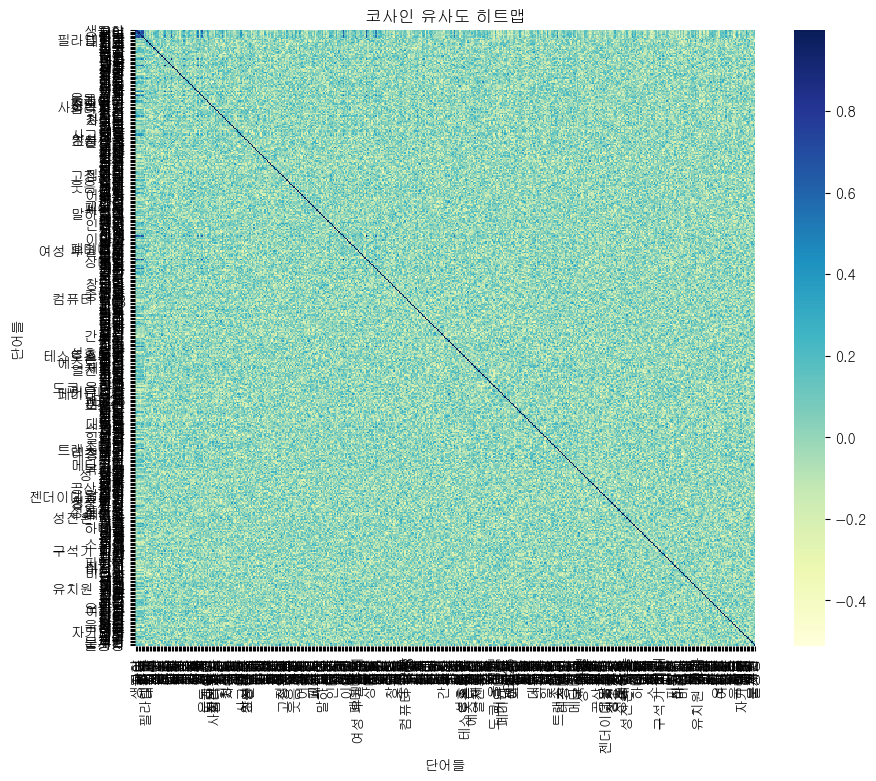

In [697]:
# 코사인 유사도 히트맵 (word_vecs가 이미 ssu로 학습되어 있음)
import matplotlib.pyplot as plt
import seaborn as sns

def cosine_heatmap(word_matrix, word_to_id, id_to_word):
    vocab_size = len(word_to_id)
    
    similarity_matrix = np.zeros((vocab_size, vocab_size))
    
    for i in range(vocab_size) : 
        for j in range(vocab_size) : 
            similarity_matrix[i][j] = cos_similarity(word_matrix[i], word_matrix[j])
            
    
    #그리기
  
    plt.figure(figsize = (10,8))
    
    sns.heatmap(similarity_matrix, xticklabels=list(id_to_word.values()), yticklabels=list(id_to_word.values()), cmap='YlGnBu', annot=False, fmt=".2f")  # 폰트 설정 추가
    plt.title('코사인 유사도 히트맵')
    plt.xlabel('단어들')
    plt.ylabel('단어들')
    plt.show()
    

cosine_heatmap(word_vecs, word_to_id, id_to_word)

    

# ssu 학습

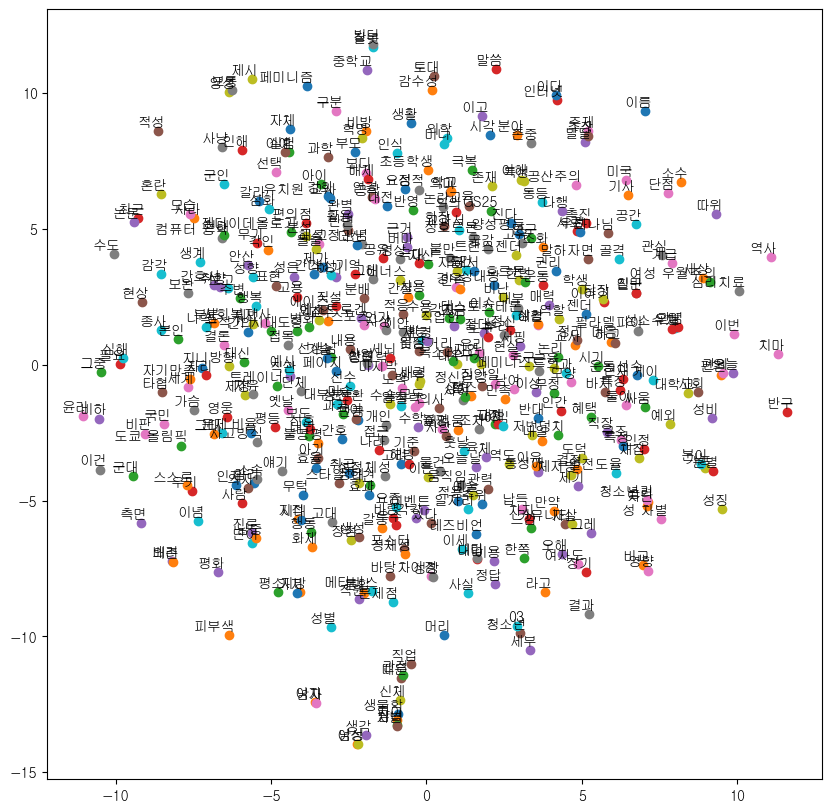

In [698]:
from sklearn.manifold import TSNE

#TSNE를 이용해 벡터 변환
tsne = TSNE(n_components = 2)
word_vecs_tsne = tsne.fit_transform(word_vecs)

#그리기
plt.figure(figsize = (10,10))

plt.rc('font', family = 'Gulim')

for word, word_id in word_to_id.items() :
    plt.scatter(word_vecs_tsne[word_id, 0], word_vecs_tsne[word_id, 1])
    plt.annotate(word, xy =  (word_vecs_tsne[word_id, 0 ], word_vecs_tsne[word_id, 1]),
                xytext = (5, 2),textcoords = 'offset points' , ha='right' , va='bottom' )
    

plt.show()

In [699]:
def most_similar_words(query_word, word_to_id, id_to_word, word_matrix, top=5):
    if query_word not in word_to_id:
        print(f"{query_word}를 찾을 수 없습니다.")
        return

    query_id = word_to_id[query_word]
    query_vec = word_matrix[query_id]

    similarity = np.dot(word_matrix, query_vec)

    count = 0
    for i in (-similarity).argsort():
        if id_to_word[i] == query_word:
            continue
        print(f"{id_to_word[i]}: {similarity[i]}")
        
        count += 1
        if count >= top:
            return

In [700]:
for i in word_to_id:
    print(f"[{i}]" )
    most_similar_words(i, word_to_id, id_to_word, word_vecs, top=3)
    print("")


[생물학]
남성: 269.80400791838565
여성: 257.9706334485681
생각: 233.07654051924686

[차이]
남성: 305.41360181732057
생각: 293.64553128227277
여성: 286.4067002571053

[남녀]
생각: 224.2345327549748
남성: 223.35654257536578
여성: 207.78714409869988

[평등]
생각: 120.92848876942051
남성: 111.01739564024005
여성: 102.25820260716031

[생각]
남성: 591.121483974105
여성: 536.8681935920874
남자: 351.28444830050273

[차별]
생각: 253.32396074707256
남성: 249.20745429352564
여성: 231.82685630364765

[미국]
기사: 26.524646965551906
집안일: 25.575268490313327
뿌리: 19.73937840492756

[필라델피아]
남자: 56.39379803462736
생각: 53.35765390107511
여자: 52.59466331991873

[대학교]
예외: 24.765542644665818
사회: 23.2633305810794
소속: 19.215811971168453

[의과]
생각: 25.668653922836096
차이: 21.604965673773155
변화: 20.8735625458059

[지니]
영향: 20.976789124879623
소수: 19.83562368955653
남자: 18.837510976712334

[교수]
남성: 35.547877364519735
여성: 35.44553468701752
컴퓨터 공학: 18.0186315357123

[연구]
말씀: 20.109601355441786
부분: 16.812496448851785
고유: 16.57674525921783

[최근]
논문: 23.062367478130064
혼란: 22

# Word2Vec학습(라이브러리 사용)

In [701]:
from gensim.models import Word2Vec

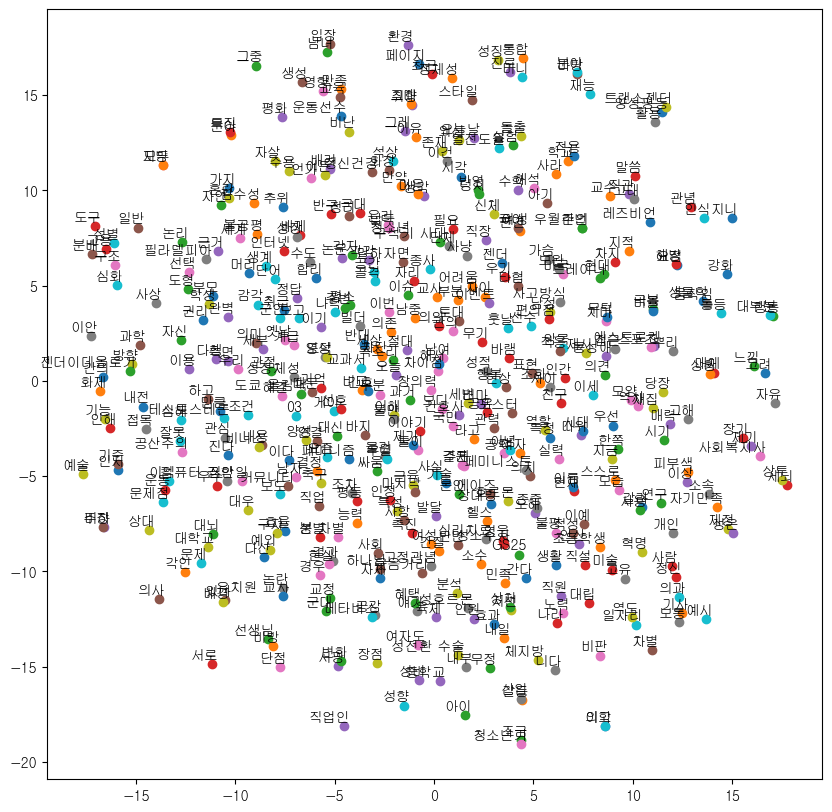

In [702]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Word2Vec 모델로부터 단어 벡터를 가져와 배열로 변환
word_vectors = model.wv[model.wv.key_to_index]

# t-SNE를 사용하여 단어 벡터를 2차원 공간으로 변환
tsne = TSNE(n_components=2)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# 시각화
plt.figure(figsize=(10, 10))
plt.rc('font', family='Gulim') 
for word, word_id in word_to_id.items():
    if word in model.wv:
        plt.scatter(word_vectors_tsne[word_id, 0], word_vectors_tsne[word_id, 1])
        plt.annotate(word, xy=(word_vectors_tsne[word_id, 0], word_vectors_tsne[word_id, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
plt.show()
